In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from main import PreProcessing, Statistics, ExtractionFeatures
import numpy as np
import json
from scipy.stats import mode, median_abs_deviation, iqr, trim_mean, entropy as ent, skew, kurtosis
from scipy.signal import welch, correlate, stft
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from scipy.fft import fft, fftfreq
import entropy as ent
import os

file_path = "C:/Users/antho/Documents/MEMOIRE_M2/c3d_audeline/A_P_1956-02-21_ON_DM_1.c3d"
# Instancier l'objet DetectFog
detector = PreProcessing(file_path)
# plt.plot(detector.c3d['data']['analogs'][0][0,:])
detector.creation_json_grace_c3d()
# detector.plot_data_FOG("Foot", "Left", "ACC", "X")

detector.extract_data_interval()
# detector.plot_data_FOG_start_end("Foot", "Left", "ACC", "X")

# detector.plot_data_FOG_start_end("Rectus Femoris", "Left", "ACC", "X")
detector.normalize_data() 
detector.decoupage_en_fenetres()
detector.label_fenetre()
detector.association_label_fenetre_data()
data = detector.concat_label_fenetre_data()
# detector.plot_data_FOG_start_end_final("Rectus Femoris", "Left", "ACC", "norme",10) # trouver une solution pour le temps
# detector.plot_data_FOG_start_end_final("Foot", "Left", "ACC", "norme",10) # trouver une solution pour le temps

# Création de l'instance de Statistics et calcul des statistiques
stats_processor = Statistics(file_path,data)
statistiques_resultat = stats_processor.stats()


extraction_features = ExtractionFeatures(data)
extraction_features.enlever_derniere_ligne_et_colonne_label()
data_features = extraction_features.dataframe_caracteristiques_final()

c:\Users\antho\Documents\MEMOIRE_M2\CODE_STAGE_M2\code\main.py:1490: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skwenesss[nom_bande] = skew(magnitudes_bande,axis=1)
c:\Users\antho\Documents\MEMOIRE_M2\CODE_STAGE_M2\code\main.py:1522: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosiss[nom_bande] = kurtosis(magnitudes_bande,axis=1)
c:\Users\antho\Documents\MEMOIRE_M2\CODE_STAGE_M2\code\main.py:1490: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skwenesss[nom_bande] = skew(magnitudes_bande,axis=1)
c:\Users\antho\Documents\MEMOIRE_M2\CODE_STAGE_M2\code\main.py:1522: RuntimeWarning: Precision loss occurred in

In [2]:
chemin_fichier_csv_data_final = "C:/Users/antho/Documents/MEMOIRE_M2/data_final.csv"




    # # # Exporter le DataFrame en tant que fichier CSV
data_features.to_csv(chemin_fichier_csv_data_final, index=False)

# ____________________________________________________________________________________

# II. Visualisation graphique du signal non borné

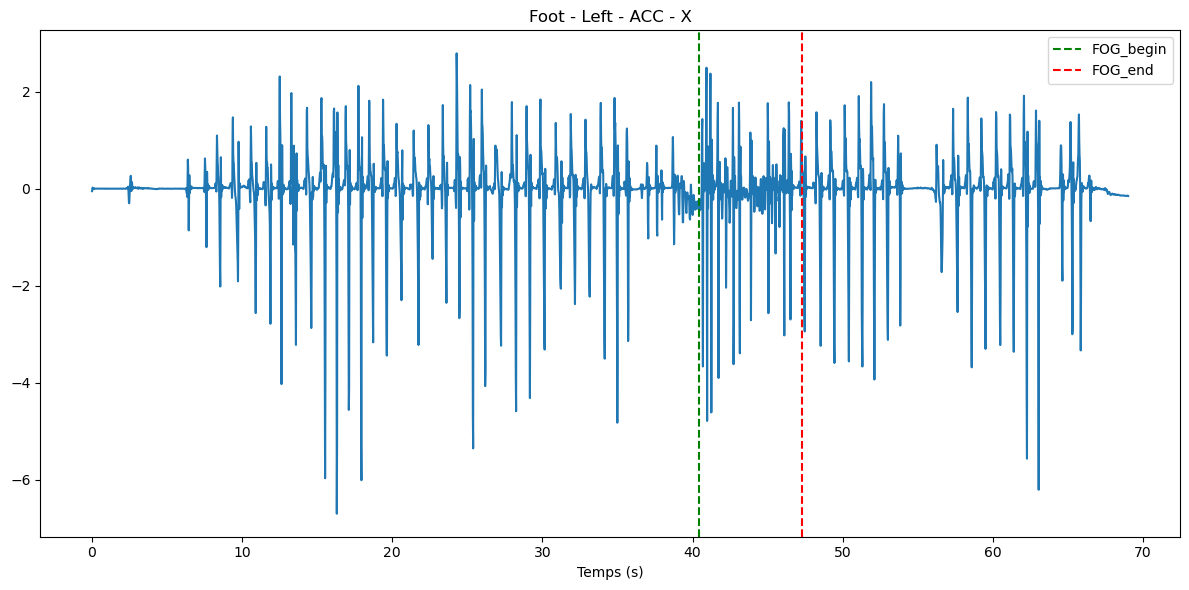

In [3]:
detector.plot_data_FOG("Foot", "Left", "ACC", "X")

# III. Visualisation graphique du signal borné entre début debout et fin debout

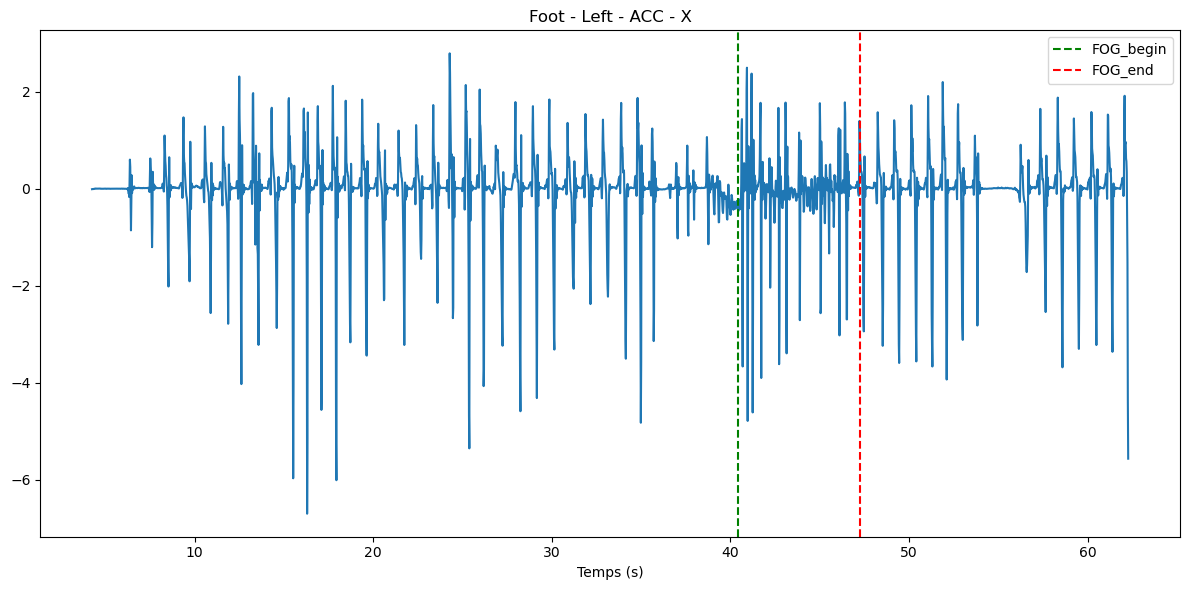

In [5]:
detector.extract_data_interval()
detector.plot_data_FOG_start_end("Foot", "Left", "ACC", "X")

# IV. Normalisation des données par rapport à l'étendue

In [7]:
detector.normalize_data() 

# V. Fenêtrage

## 1. Découpage en fenêtre de 2sec avec chevauchement à 80%

In [8]:
detector.decoupage_en_fenetres()
# Obtenir le dictionnaire global après la découpe en fenêtres
dictionnaire_global = detector.fenetres_data
print(dictionnaire_global["FOG"])


{'debut': [25.953332901000977, 45.72666549682617], 'fin': [28.226667404174805, 46.7933349609375]}


In [9]:
# On peut accéder à toutes les données des fenêtres à ce moment là, car les étiquettes FOG ne sont pas encore associées
data = detector.fenetres_data["Rectus Femoris"]["Left"]["ACC"]["X"][0:2]
test = detector.fenetres_data["Rectus Femoris"]["Left"]["ACC"]["X"]

## 2. Association des fenêtres avec les évènements de nonFog,transitionPreFog,preFog,transitionFog, fog, transitionNonFog

In [10]:
detector.label_fenetre()
detector.association_label_fenetre_data()

In [11]:
dictionnaire_global = detector.mix_label_fenetre_data

#on sélectionne une fenêtre particulière
a=dictionnaire_global["Rectus Femoris"]["Left"]["ACC"]["X"]["fog"].loc[[54]]
temps = dictionnaire_global['metadata']["temps"].loc[[54]]
rf_fog = dictionnaire_global["Rectus Femoris"]["Left"]["ACC"]["X"]["fog"]
rf_nofog = dictionnaire_global["Rectus Femoris"]["Left"]["ACC"]["X"]["noFog"]

b = pd.concat([rf_fog, rf_nofog])